# Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients 
and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as 
well as predict the overall risk using logistic regression Data Preparation.



Demographic:
    
• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


# import neccesary libraries

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Load Dataset

In [3]:
df=pd.read_csv(r"C:\Users\vsmal\framingham.csv")

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.shape

(4238, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Data Preprocessing

In [69]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['education'] = df['education'].fillna(df['education'].median())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Observation:

1)Filling the all null values.

# Skewness Plotting

C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

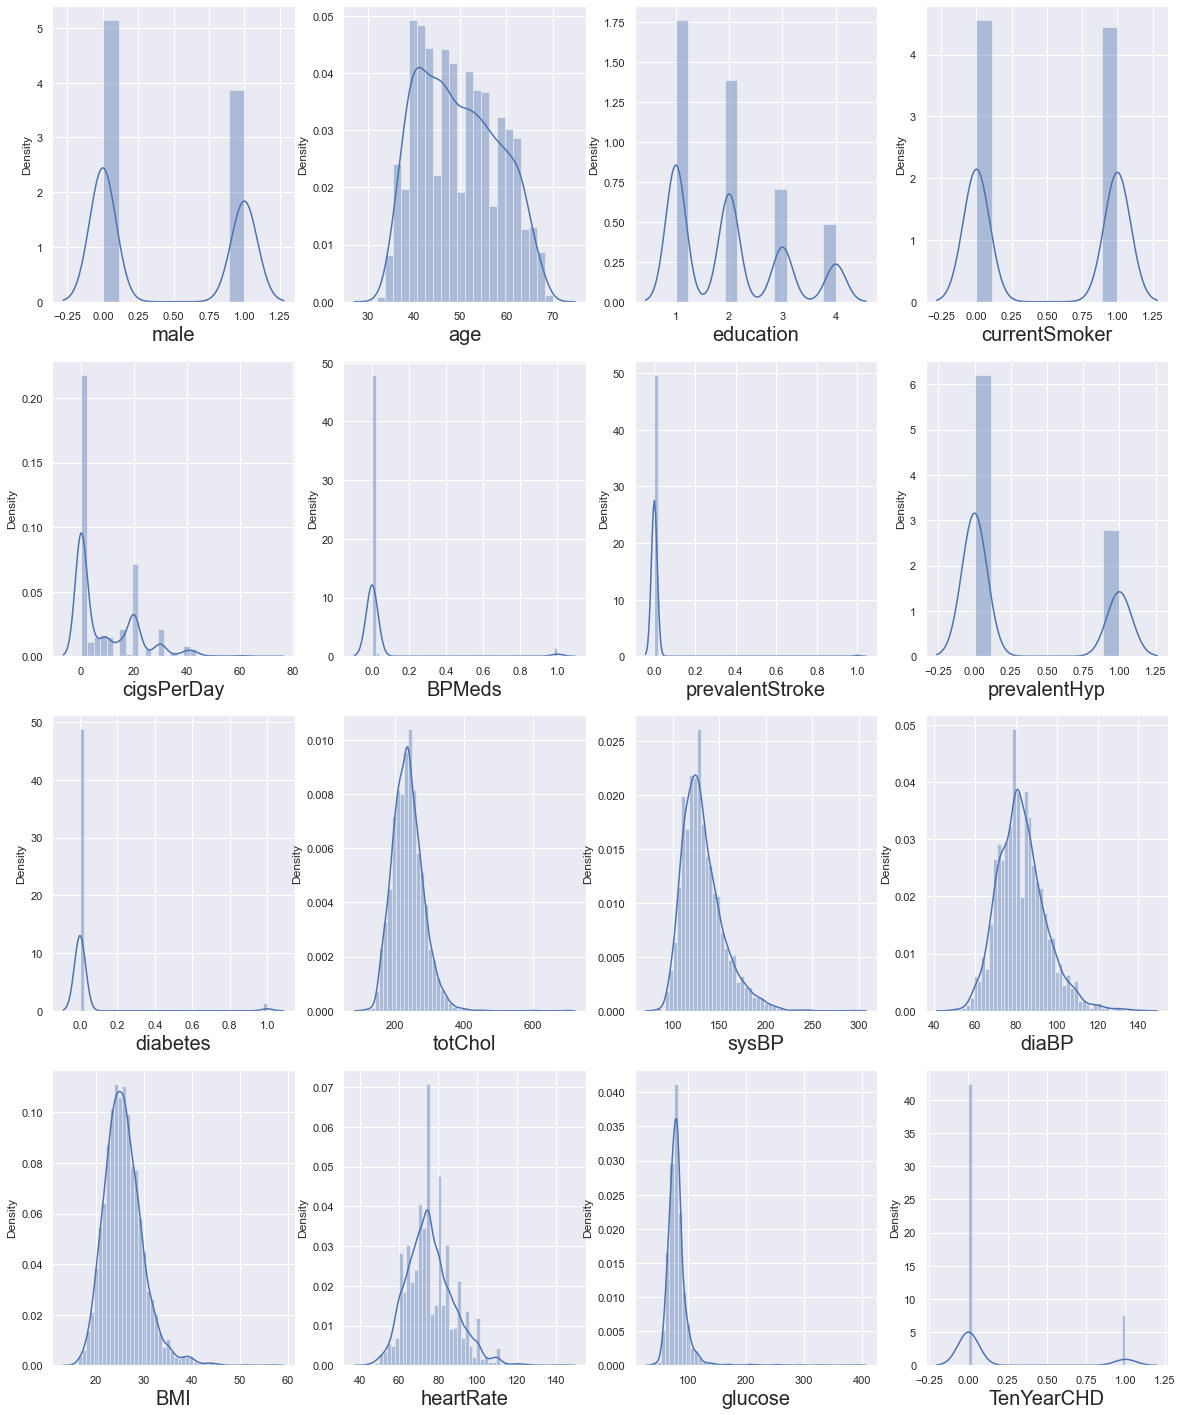

In [48]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :     # as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Observations:

1) BMI , Glucose,diaBP, Tot Chol,heartrate,,sysBP columns having low skewness.

2) diabetes,BPmeds,prevalentStroke, are highly positive skewed.

# Correlation

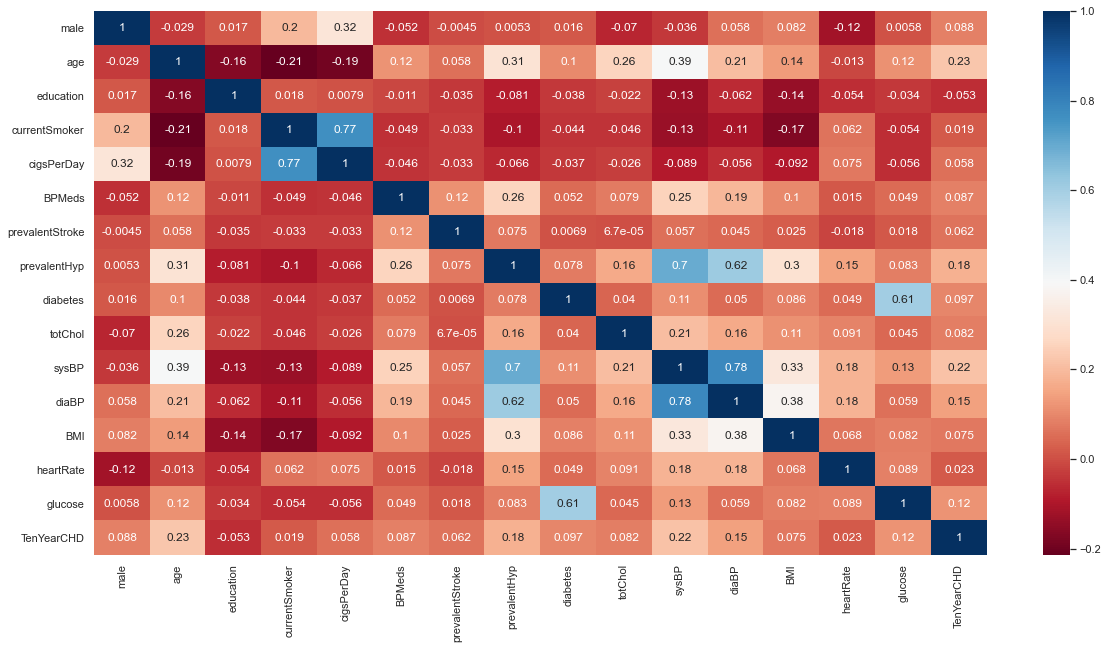

In [49]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.show()

# Observations:

1)there are no any pair with high positive correlation.

2)Some pairs having high negative correlation like currentsmoker-age,currentsmoker-BMI.

# features and Target Selection

In [50]:
x = df.drop(columns = ['TenYearCHD']) #feat
y = df['TenYearCHD']#targ

In [70]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

# spliting dataset into train and test

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)# training & testing 

# Apply Model 

In [53]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

86.0377358490566

# Accuracy is 86.03%

# Confusion Matrics

In [58]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[900,   3],
       [145,  12]], dtype=int64)

In [59]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [71]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(f"Accuracy is {Accuracy*100}%")

Accuracy is 86.0377358490566%


In [73]:
Precision = true_positive/(true_positive+false_positive)
print(f"Pricision is: {Precision}")

Pricision is: 0.9966777408637874


In [74]:
Recall = true_positive/(true_positive+false_negative)
print(f"Recall is {Recall}")

Recall is 0.861244019138756


In [63]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.9240246406570843

# ROC & AUC

In [64]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [65]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5365554309414479

In [66]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.9572249 , 0.0427751 ],
       [0.88466232, 0.11533768],
       [0.69949284, 0.30050716],
       ...,
       [0.84979246, 0.15020754],
       [0.82206248, 0.17793752],
       [0.77653311, 0.22346689]])

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

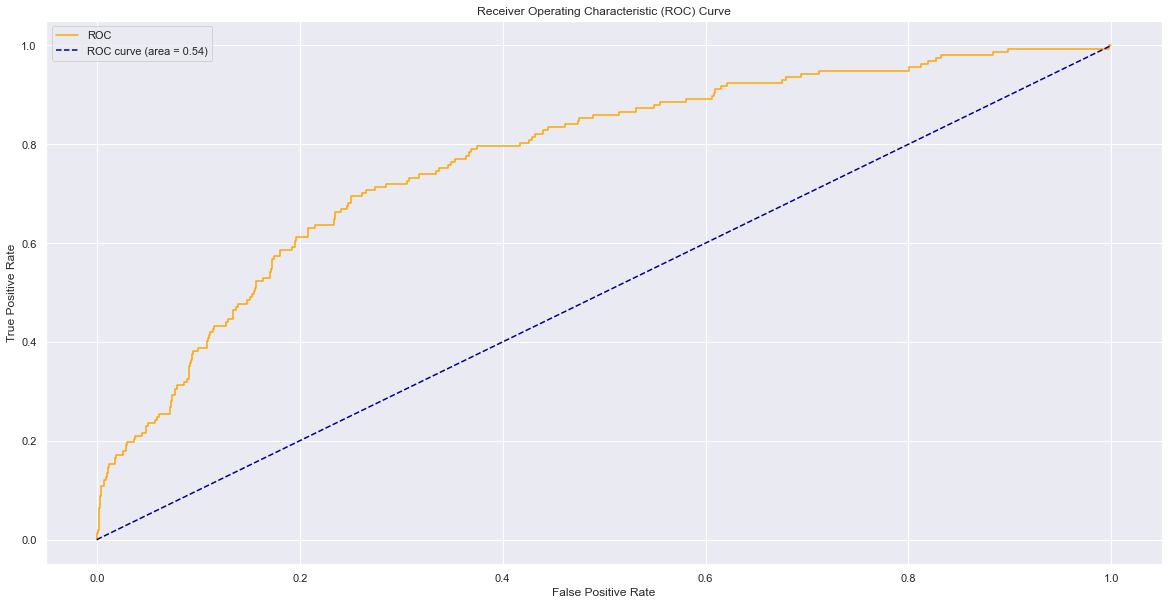

In [68]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Observations:

1) this graph shows relation between False Positive Rate and True Positive Rate.

2) Area under curve is 0.54.